In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_att_g_salary_19-20')

In [3]:
rbs.dtypes

NAME           object
ATT/G         float64
ATT/G_rank    float64
salary          int64
dtype: object

In [4]:
rbs.head()

,NAME,ATT/G,ATT/G_rank,salary
0,Ezekiel Elliott,18.8,2.0,15000000
1,Josh Jacobs,18.6,3.5,2983350
2,Nick Chubb,18.6,3.5,1845774
3,Dalvin Cook,17.9,6.5,1588334
4,Christian McCaffrey,17.9,6.5,4310326


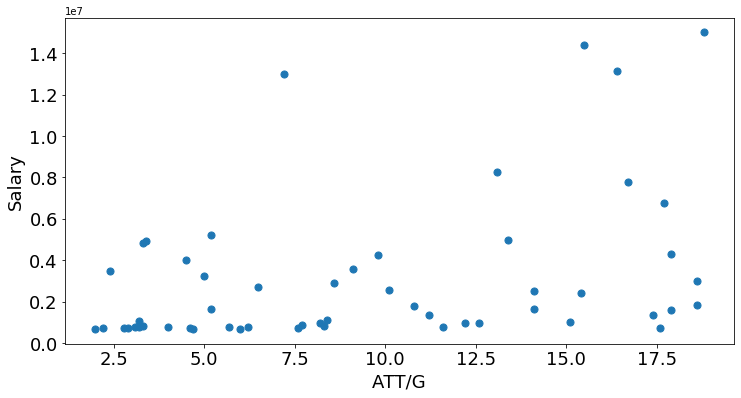

In [5]:
ax = rbs.plot(kind="scatter", x = 'ATT/G',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('ATT/G', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['ATT/G', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 2.42604291e-16, -3.28954970e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.99435543, -0.35244414],
       [ 1.06044847,  1.07534397],
       [ 1.32647256, -0.30156529],
       [ 0.92237368,  3.00908332],
       [ 0.04855752, -0.39773465]])

In [11]:
km.predict(X)

array([3, 2, 2, 2, 2, 1, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,ATT/G,ATT/G_rank,salary,clusters
0,Ezekiel Elliott,18.8,2.0,15000000,3
1,Josh Jacobs,18.6,3.5,2983350,2
2,Nick Chubb,18.6,3.5,1845774,2
3,Dalvin Cook,17.9,6.5,1588334,2
4,Christian McCaffrey,17.9,6.5,4310326,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.06363636e+00, 1.85270309e+06],
       [1.52250000e+01, 6.95909975e+06],
       [1.66700000e+01, 2.03466820e+06],
       [1.44750000e+01, 1.38750000e+07],
       [9.72857143e+00, 1.69072436e+06]])

In [14]:
rbs.groupby('clusters')[['ATT/G', 'salary']].mean()

,ATT/G,salary
clusters,,
0,4.063636,1.852703e+06
1,15.225000,6.959100e+06
2,16.670000,2.034668e+06
3,14.475000,1.387500e+07
4,9.728571,1.690724e+06


In [15]:
centroids = rbs.groupby('clusters')[['ATT/G', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

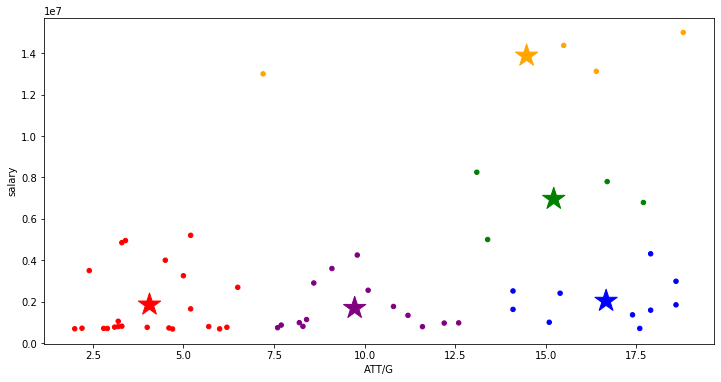

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'ATT/G', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'ATT/G', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

14.017383497690274

In [18]:
silhouette_score(X, km.labels_)

0.44607825779062577